# Machine Learning and Computer Vision
## Assigment 2

---

This assignment contains 3 programming exercises. Please review the pdf file for more detail information.


## Problem 1 Image shift
Shifting an image x of size (n1, n2) in a direction (k, l) consists in creating a new image xshifted of size
(n1, n2) such that

<img src="markdown/fig1.png">

In practice, boundary conditions should be considered for pixels (i, j) such that (i + k, j + l) not equal to [0, n1-1] x [0, n2-1]. 

A typical example is to consider periodical boundary conditions such that

<img src="markdown/fig2.png">

Create in imshift function implementing the shifting of an image x in periodical boundary, such as the following image(b) Shifted in the direction (k,l) by (+100,-50):
<img src="markdown/fig3.png">

Hint: First write it using loops, and next try to get rid of the loops.

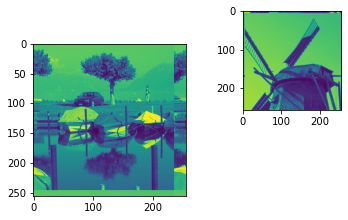

In [11]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

#with loops
def imshift(x, k, l):
    xshifted = np.zeros((x.shape[0],x.shape[1]))
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            xshifted[i][j] = x[(i+k)%x.shape[0]][(j+l)%x.shape[1]]
    return xshifted

#without loops
def imshift_no_loops(x, k, l):
    xshifted = np.roll(x, k, axis=0)
    xshifted = np.roll(xshifted, l, axis=1)
    return xshifted

#Sample call and Plotting code
#“lake.png” and "windmill.png"
img1 = imread('lake.png')
img2 = imread('windmill.png')

#Plotting code below
plt.subplot(1, 2, 1) 
plt.imshow(imshift(img1, 10, 20))

plt.subplot(2, 2, 2) 
plt.imshow(imshift_no_loops(img2, 5, 5))

Check on x = windmill.png and y = lake.png, if this operation is linear, i.e.,
<img src="markdown/fig4.png">
After shifting the image in the direction (k, l), shift it back in the direction ( k,  l). Interpret the results. Which shift is one-to-one?

In [22]:
#“lake.png” and "windmill.png"
y = imread('lake.png')
x = imread('windmill.png')

#without loops
def imshift(x, k, l):
    xshifted = np.roll(x, k, axis=0)
    xshifted = np.roll(xshifted, l, axis=1)
    return xshifted

#check
def check(x, y):
    if (x==y).all():
        print("This operation is linear.")
    else:
         print("This operation is not linear.")

#shift back
def shift_back(x, k, l):
    x_new = imshift(imshift(x, k, l), -k, -l)
    check(x_new, x)

shift_back(y, 10, 30)

This operation is linear.


## Problem 2 Convolution
In this problem, we intend to explore and implement 2D convolution.

<img src="markdown/conv.png">

First, Create imkernel function that produces a function handle nu implementing a convolution kernel functions on the finite support (-s1, s1)x(-s2, s2). In this case, we specifies the ’gaussian’ kernel as following.

Create imconvolve_naive function that performs(except around boundaries) the convolution between x (image) and v (kernel) with four nested loops [ The outer 2 loops for looping over the image, inner 2 loops for looping over the kernel].

Create imconvolve_spatial function that performs the convolution between x (image) and v (kernel) including around boundaries. The spatial method intend to create a stacked-up image, which is a 3D matrix with dimension [ image_height x image_width x total_kernel_number]. The final code should read with only two loops. 

The idea is to switch the inner loops with the outer loops, and then make use of imshift to eliminate the need to use the outter loop to go over the entire image, but use shift function to shift the image along the inner loop and store the each result into your 3D matrix. With the stacked-up matrix, you can perform convolution calculation with ease. on the 3D matrix.


Write a script test_imconvolve function that compares the results and the execution times of imconvolve_naive and imconvolve_spatial, give comment on the execution times of two methods. You should have similar result like:
<img src="markdown/fig5.png">







AttributeError: 'function' object has no attribute 'shape'

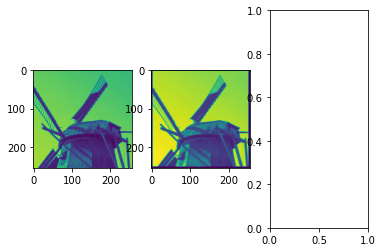

In [11]:
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt
from time import time

def imkernel(tau, s1, s2):
    '''
    The kernel (window) function already, you can use that function to generate your kernel. 

    Note: the function is slightly difference than just a matrix. As you can see it returned a 
    lambda function object. You need to assign location of the kernel, then it will return 
    specified value in that location of the kernel.
    
    For example, we want a 3x3 window, (note: in this function, we said the center point to be 
    location (0,0), so s1 is the absolution distance to the center point, for example: s1 means 
    from -1 to 1): 

    nu = imkernel(tau,s1,s1);   #<------- generated a 3x3 window funtion
    nu(-1,-1)  #<--------- this will return the top left corner value of the kernel
    nu(0,0)  #<--------- this will return the center value of the kernel

    '''
    w = lambda i,j:np.exp(-(i**2+j**2)/(2*tau**2))
    # normalization
    i,j=np.mgrid[-s1:s1,-s2:s2]
    Z = np.sum(w(i,j))
    nu = lambda i,j: w(i,j)/Z*(np.absolute(i)<= s1&np.absolute(j)<=s2)
    return nu

# Create imconvolve_naive function,
def imconvolve_naive(im, nu, s1, s2):
    (n1,n2)=im.shape
    xconv = np.zeros((n1,n2))

    for i in range(s1, n1-s1):
        for j in range(s2,  n2-s2):
            middle_value = 0
            for k in range(-s1, s1):
                for l in range(-s2, s2):
                    v_k_l = np.conj(nu(-k, -l))
                    x_ik_jl = im[i-k-1][j-l-1]
                    middle_value = v_k_l * x_ik_jl + middle_value
            xconv[i][j] = middle_value
    '''
    nu = conv_transform(nu, s1, s2)
    (n1,n2)=im.shape
    (w1,w2)=nu.shape
    h1 = w1//2
    h2 = w2//2
    
    xconv = np.zeros(im.shape)
    
    for i in range(h1, n1-h1):
        for j in range(h2, n2-h2):
            sum = 0
            for k in range(0, w1-1):
                for l in range(0, w2-1):
                    sum = sum + nu(k, l)*img[i-h1+k][j-h2+l]
            xconv[i][j] = sum
    Edition 1
    '''
    return xconv

#Create imconvolve_spatial function
def imconvolve_spatial(x, nu, s1, s2):
    xconv = np.empty((x.shape[0], x.shape[1], nu.shape[2]))
    
    for i in range(nu.shape[0]):
        xconv = np.dstack((xconv,imconvolve_naive(x, nu[i], s1, s2)))
    
    return xconv
'''
#Create imconvolve_spatial function
def imconvolve_spatial(im, nu, s1, s2):
    n1 = im.shape[0]
    n2 = im.shape[1]
    
    
    return xconv
'''

#Create test_imconvolve function
def test_imconvolve():
    to = time()
    return time()-t0

#Sample call and Plotting code
tau = 1
s1 = 4
s2 = 4
img1 = imread('windmill.png')
                                            
#Plotting code below
plt.subplot(1, 3, 1) 
plt.imshow(img1)

plt.subplot(1, 3, 2) 
plt.imshow(imconvolve_naive(img1, imkernel(tau, s1, s2), s1, s2))

plt.subplot(1, 3, 3) 
plt.imshow(imconvolve_spatial(img1, imkernel(tau, s1, s2), s1, s2))


## Problem 3: Order-statistic filtering

Order-statistic filters (OSF) are local filters that are only based on the ranking of pixel values inside a sliding window.
1. Create in imstack(img,s1,s2) function that creates a stack xstack of size n1 ×n2 ×s, which s = (2s1 +1)(2s2 +1) from the n1 ×n2 image x, such that xstack(i,j,:) contains all the values of x in the neighborhood (−s1, s1) × (−s2, s2). This function should take into account the four possible boundary conditions.

    Hint: you can use imshift, which we implemented in assignment 1, and only two loops for −s1 <= k <= s1 and −s2<= l<= s2.
    
2. Create in imosf() function
     function imosf(x, type, s1, s2) that implements order-statistic filters, returns xosf. imosf should first call imstack, next sort the entries of the stack with respect to the third dimension, and create the suitable output xosf according to the string type as follows:
     
    • 'median': select the median value,
    
    • 'erode': select the min value,
    
    • 'dilate': select the max value,
    
    • 'trimmed': take the mean after excluding at least 25% of the extreme values on each side.
    
3. Create in imopening() and imclosing() function that performs the opening and closing by the means of OSF filters.
    <img src="markdown/fig6.png">

4. Load castle.png. Write a script to test imosf() that loads the image x = castle and create a corrupted version of image x with 10% of impulse noise (salt and pepper)

Apply your OSF filters and zoom on the results to check that your results are consistent with the following ones:
    <img src="markdown/fig7.png">

Note: Typo on image, (d) -- opening , (e) -- closing


(256, 256)


Text(0.5, 1.0, '(e) closing')

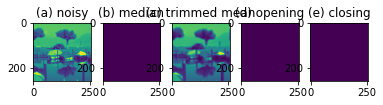

In [47]:
from scipy import stats
import numpy as np
from imageio import imread
import matplotlib.pyplot as plt

#Function
#Quote imshift function in assignment 1
def imshift_no_loops(x, k, l):
    xshifted = np.roll(x, k, axis=0)
    xshifted = np.roll(xshifted, l, axis=1)
    return xshifted

#Create imstack function
def imstack(img, s1, s2):
    img_origin = img
    xstack = np.empty((img.shape[0],img.shape[1],(2*s1 +1)*(2*s2 +1)))#np.zeros(np.stack([img, img], axis=2))
    '''
    Edition 1
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(0, 2*s1):
                for l in range(0, 2*s2):
                    img = imshift_no_loops(img, k-s1, l-s2)
                    xstack[i, j, (k+l)] =  img[i, j]  
                    img = img_origin
    '''
    '''
    Edition 2
    for k in range(-s1, s1):
        for l in range(-s2, s2):
            img = imshift_no_loops(img, k, l)
            img_list[0] = img
            counter = counter+1
            img = img_origin
    xstack = np.stack((img_list[range(0, (2*s1 +1)*(2*s2 +1)-1)], axis=2))
    '''
    for k in range(-s1, s1+1):
        for l in range(-s2, s2+2):
            img = imshift_no_loops(img, k, l)
            np.array([img])
            xstack = np.dstack((xstack,img))
            img = img_origin
        
    return xstack

#Create imosf() function 
def imosf(x, type, s1, s2):
    xosf = imstack(x, s1, s2)
    xosf = np.sort(xosf, axis=2)
    
    if (type == 'median'):
        xosf = xosf[:, :, round(1/2*(2*s1 +1)*(2*s2 +1))]
    if (type == 'erode'):
        xosf = xosf[:, :, 0]
    if (type == 'dilate'):
        xosf = xosf[:, :, ((2*s1+1)*(2*s2+1)-1)]
    if (type == 'trimmed'):
        xosf = stats.trim_mean(xosf, 0.25, axis=2)
    return xosf 

#Create imopening() function
def imopening(x, s1, s2):
    imosf_imopening = imosf(x, 'dilate', s1, s2)
    imosf_imopening = imosf(imosf_imopening, 'erode', s1, s2)
    return imosf_imopening

#Create imclosing() function
def imclosing(x, s1, s2):
    imosf_imclosing = imosf(x, 'erode', s1, s2)
    imosf_imclosing = imosf(imosf_imclosing, 'dilate', s1, s2)
    return imosf_imclosing

#Import image here
# Sample call
# castle.png
img1 = imread('lake.png')
s1 = 4
s2 = 4
print(img1.shape)


plt.subplot(1, 5, 1) 
plt.imshow(img1)
plt.title('(a) noisy')

plt.subplot(1, 5, 2) 
plt.imshow(imosf(img1, 'median', s1, s2))
plt.title('(b) median')

plt.subplot(1, 5, 3) 
plt.imshow(imosf(img1, 'trimmed', s1, s2))
plt.title('(c) trimmed mean')

plt.subplot(1, 5, 4) 
plt.imshow(imopening(img1, s1, s2))
plt.title('(d) opening')

plt.subplot(1, 5, 5) 
plt.imshow(imclosing(img1, s1, s2))
plt.title('(e) closing')


## Conclusion

Have you accomplished all parts of your assignment? What concepts did you used or learned in this assignment? What difficulties have you encountered? Explain your result for each section. Please wirte one or two short paragraph in the below Markdown window (double click to edit).

**** Your Conclusion: ****

--Parts accomplished: problem1(yes), problem2(no) and problem3(yes) --Concept used to optimize: problem 
1(np.roll to avoid usage of for loops), Problem2(), problems(1st edition: 4 loops to go through every pixel in single image, 2nd edition: use np.stack to stack images in the third axis without success, 3rd edition: use A = np.array([A]) to add a dimension in A, and use np.dstack to stack all images in) --Diffucluties: problem1(hard to escape loops in operations), problem2(hard to understand function imkernel which generates the window function and use it; hard to figure out the relationship between defined functions), and problem3(first, 4 loops make it impossible to debug; then, np.stack is not suitable to stack two many images with index)






---
** Submission Instructions**  
Remember to submit you pdf version of this notebook to Gradescope. You can find the export option at File $\rightarrow$ Download as $\rightarrow$ PDF via LaTeX